In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
df=pd.read_csv("/content/Air data.csv",encoding='unicode_escape')

In [3]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [4]:
df.shape

(207237, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207237 entries, 0 to 207236
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     134275 non-null  object 
 1   sampling_date                207237 non-null  object 
 2   state                        207237 non-null  object 
 3   location                     207237 non-null  object 
 4   agency                       131028 non-null  object 
 5   type                         204280 non-null  object 
 6   so2                          186270 non-null  float64
 7   no2                          197125 non-null  float64
 8   rspm                         183114 non-null  float64
 9   spm                          102665 non-null  float64
 10  location_monitoring_station  190436 non-null  object 
 11  pm2_5                        5078 non-null    float64
 12  date                         207236 non-null  object 
dtyp

In [6]:
df.isnull().sum()

,0
stn_code,72962
sampling_date,0
state,0
location,0
agency,76209
type,2957
so2,20967
no2,10112
rspm,24123
spm,104572


In [7]:
df.describe()

,so2,no2,rspm,spm,pm2_5
count,186270.000000,197125.000000,183114.000000,102665.000000,5078.000000
mean,9.794809,21.467229,94.883755,195.091400,37.762076
std,9.396810,14.788967,65.732374,132.467858,32.650556
min,0.000000,0.000000,0.000000,0.000000,4.000000
25%,4.000000,12.000000,52.000000,102.000000,23.000000
50%,7.000000,18.000000,80.000000,172.000000,30.000000
75%,13.000000,27.000000,118.000000,256.000000,37.000000
max,273.300000,696.000000,1082.000000,2213.000000,395.000000


In [8]:
df.nunique()

,0
stn_code,391
sampling_date,5304
state,19
location,181
agency,39
type,10
so2,2213
no2,3163
rspm,3338
spm,3421


In [9]:
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

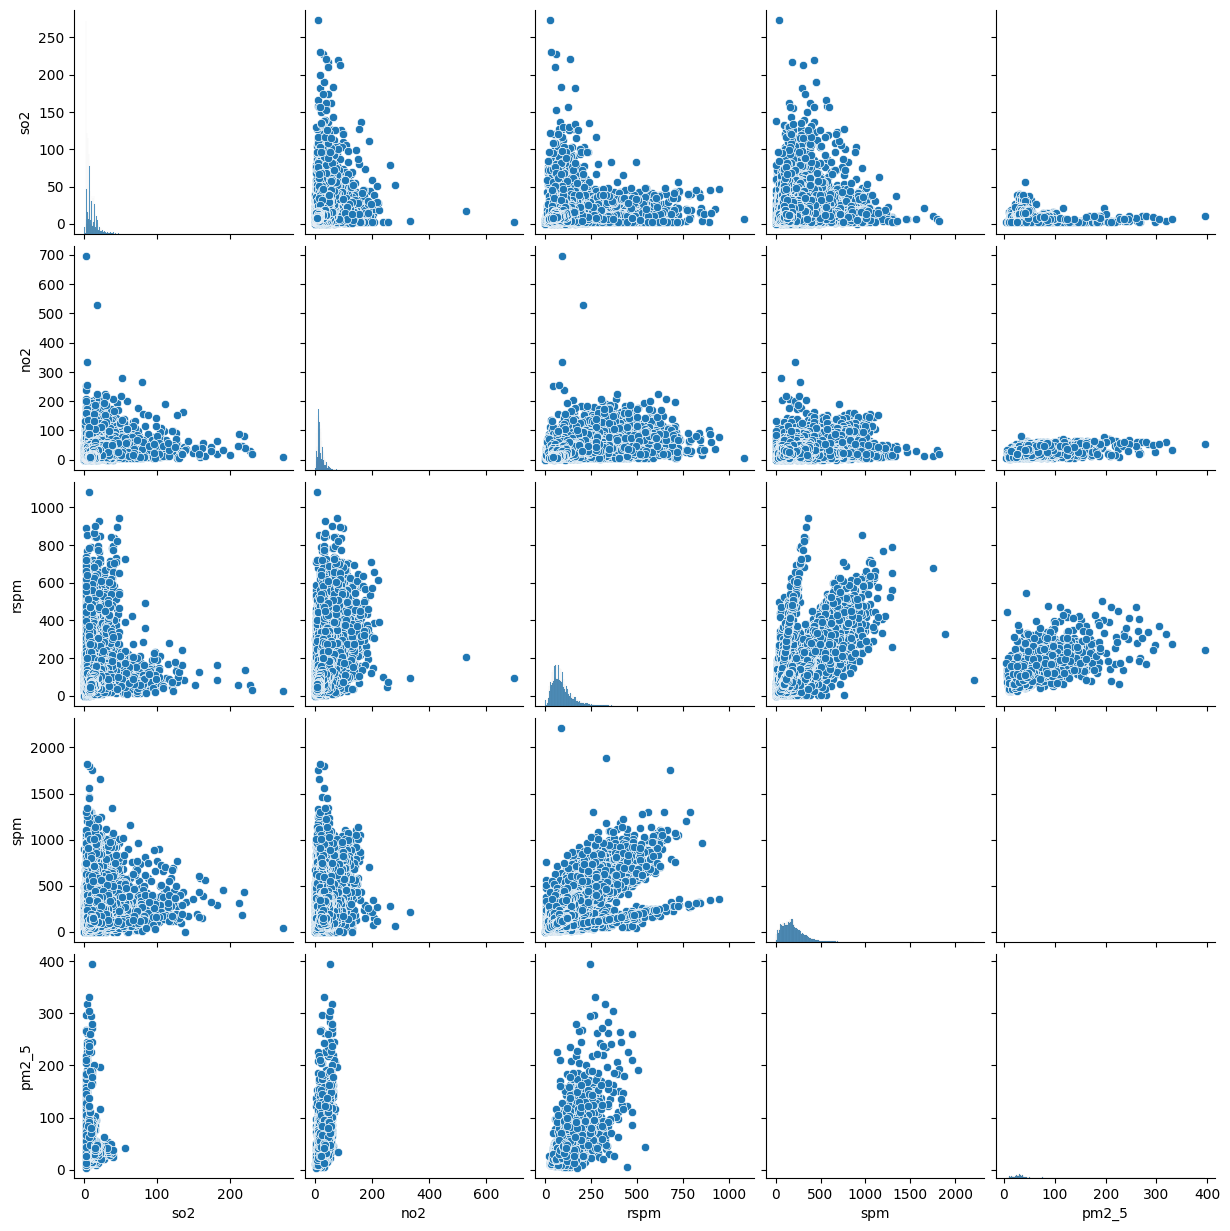

In [10]:
sns.pairplot(data=df)

In [11]:
df['state'].value_counts()

,count
state,
Andhra Pradesh,26368
Kerala,24728
Himachal Pradesh,22896
Gujarat,21279
Madhya Pradesh,19920
Assam,19361
Karnataka,17119
Maharashtra,10000
Delhi,8551


[]

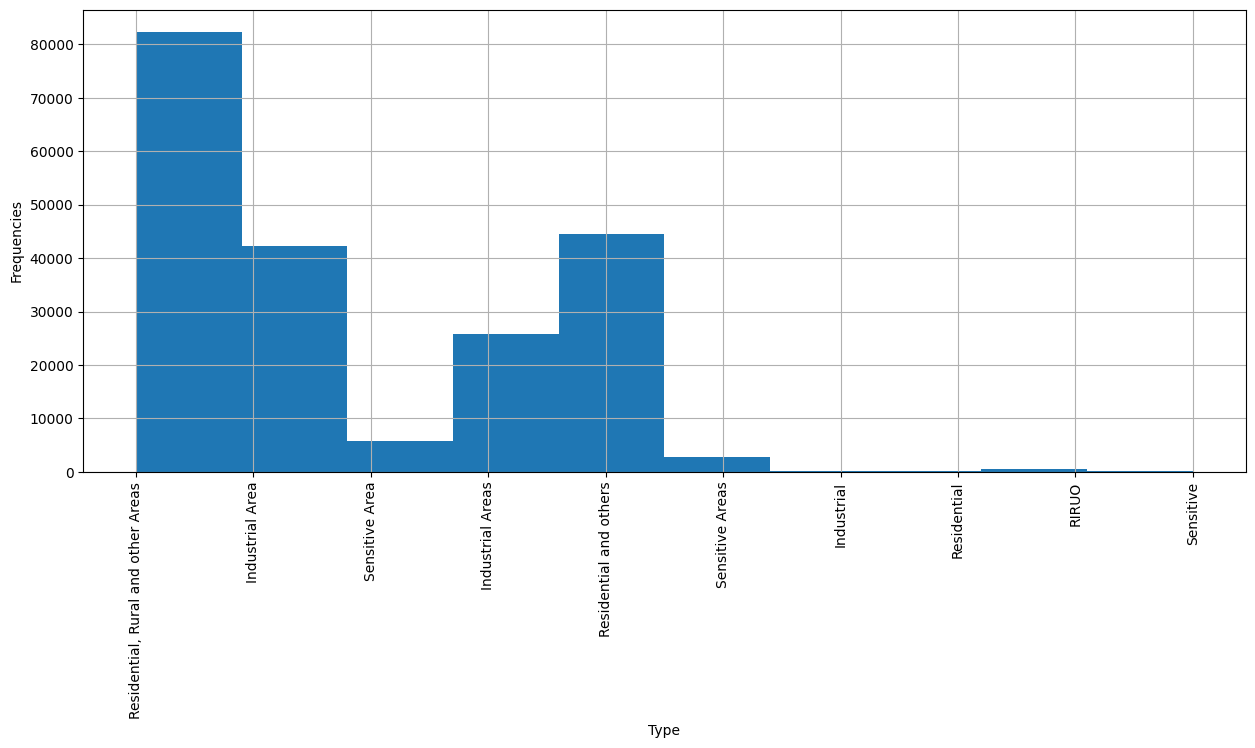

In [12]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.type.hist()
plt.xlabel('Type')
plt.ylabel('Frequencies')
plt.plot()

In [13]:
df['type'].value_counts()

,count
type,
"Residential, Rural and other Areas",82360
Residential and others,44461
Industrial Area,42328
Industrial Areas,25712
Sensitive Area,5829
Sensitive Areas,2789
RIRUO,473
Sensitive,155
Industrial,92


[]

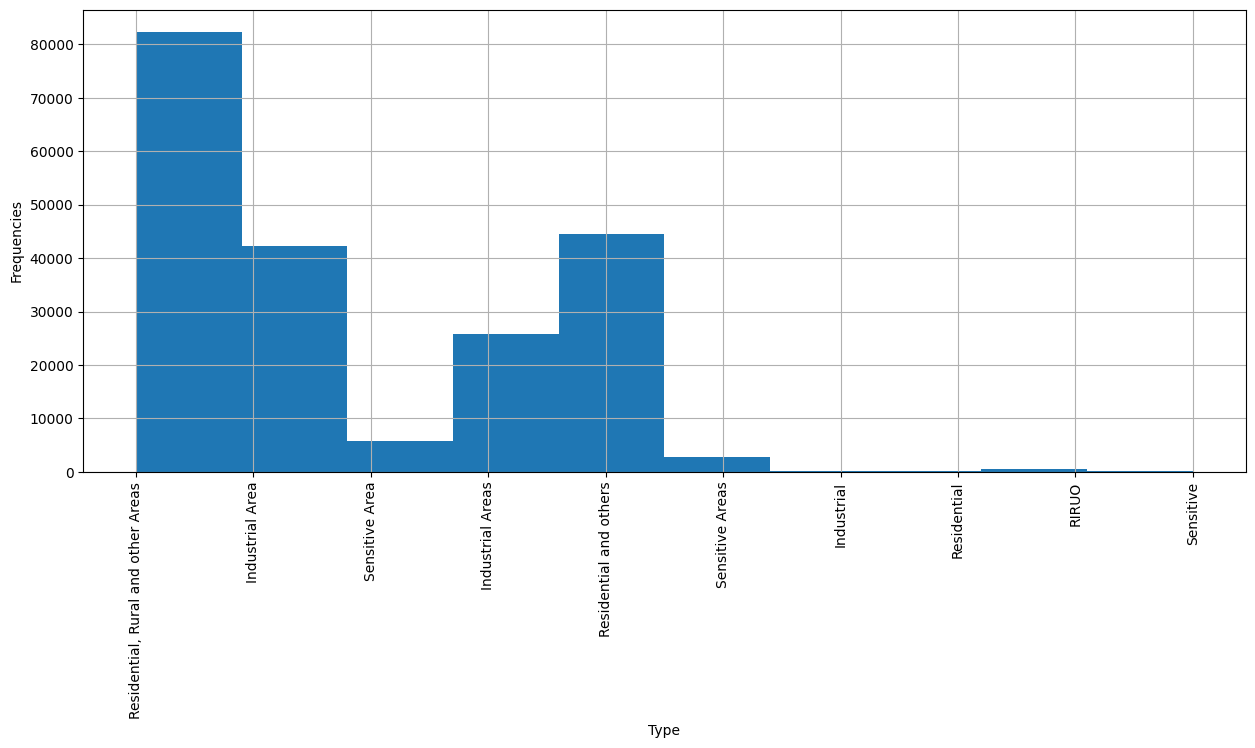

In [14]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.type.hist()
plt.xlabel('Type')
plt.ylabel('Frequencies')
plt.plot()

In [15]:
df['agency'].value_counts()

,count
agency,
Andhra Pradesh State Pollution Control Board,15691
Himachal Pradesh State Environment Proection & Pollution Control Board,15287
Kerala State Pollution Control Board,13782
Assam State Pollution Control Board,13427
Karnataka State Pollution Control Board,10050
Madhya Pradesh State Pollution Control Board,9977
Gujarat State Pollution Control Board,8763
National Environmental Engineering Research Institute,5650
Goa State Pollution Control Board,5040


[]

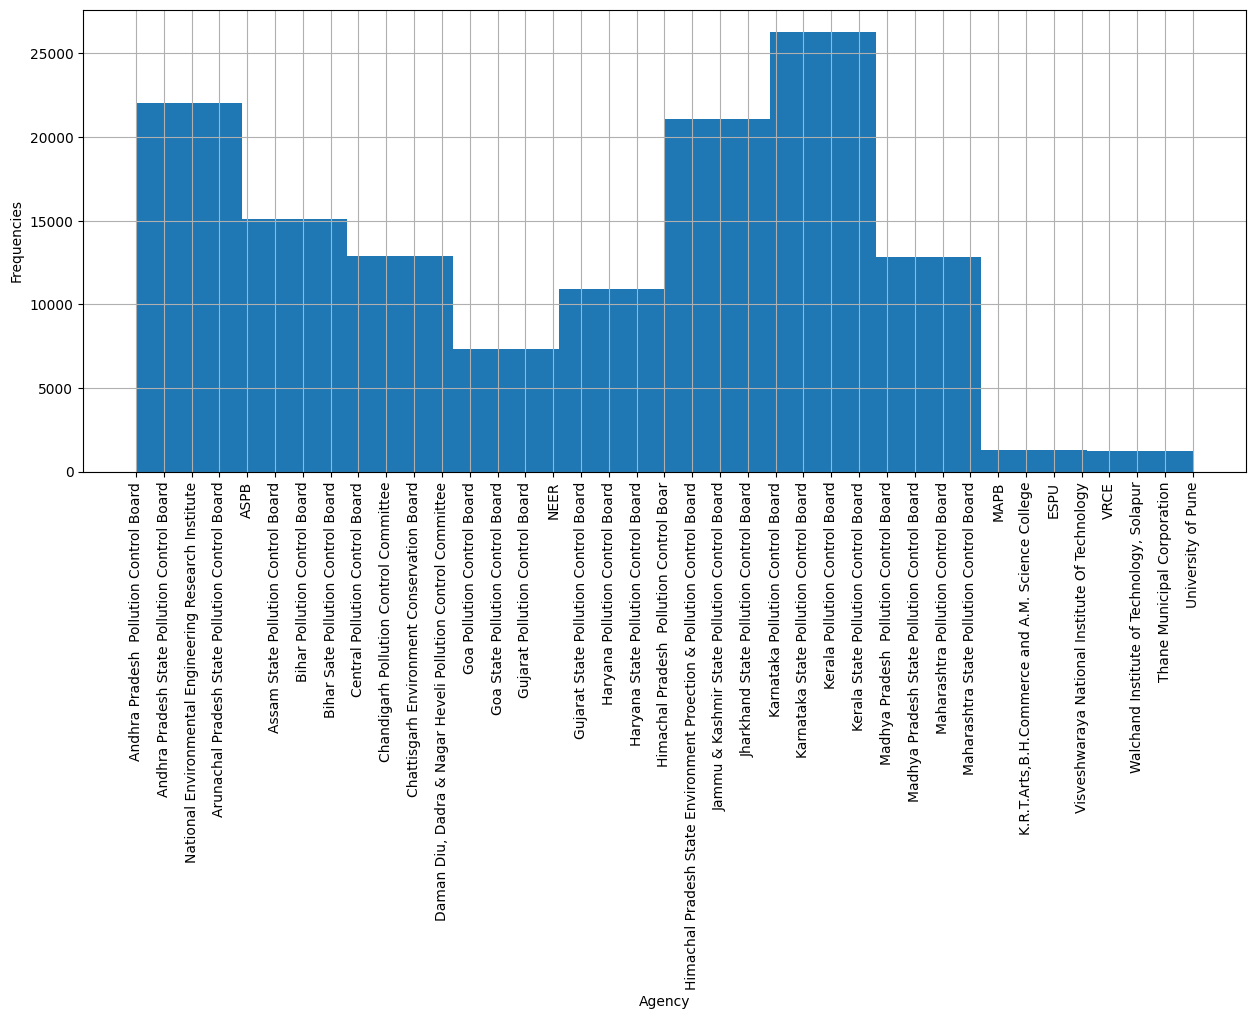

In [16]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
df.agency.hist()
plt.xlabel('Agency')
plt.ylabel('Frequencies')
plt.plot()

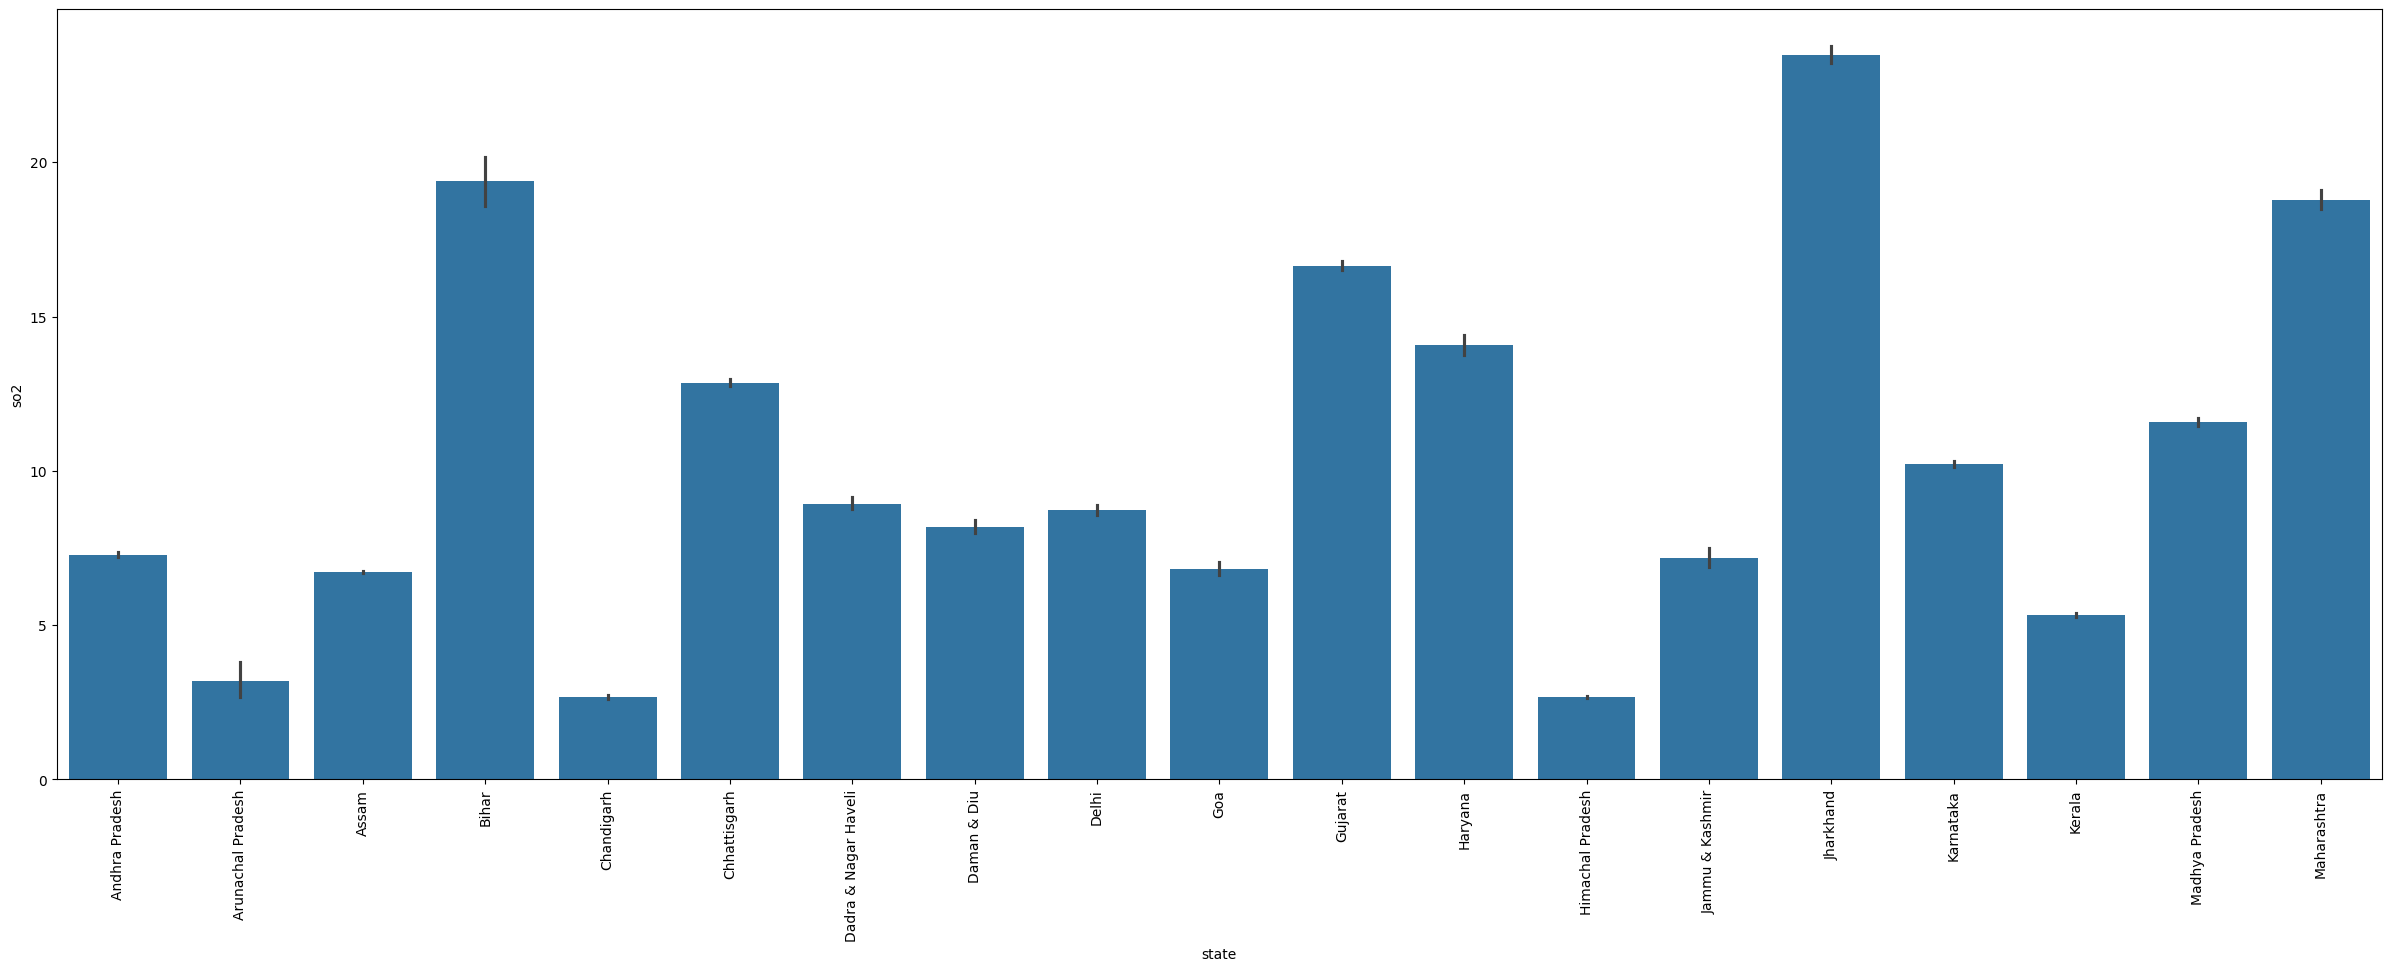

In [17]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='so2',data=df);

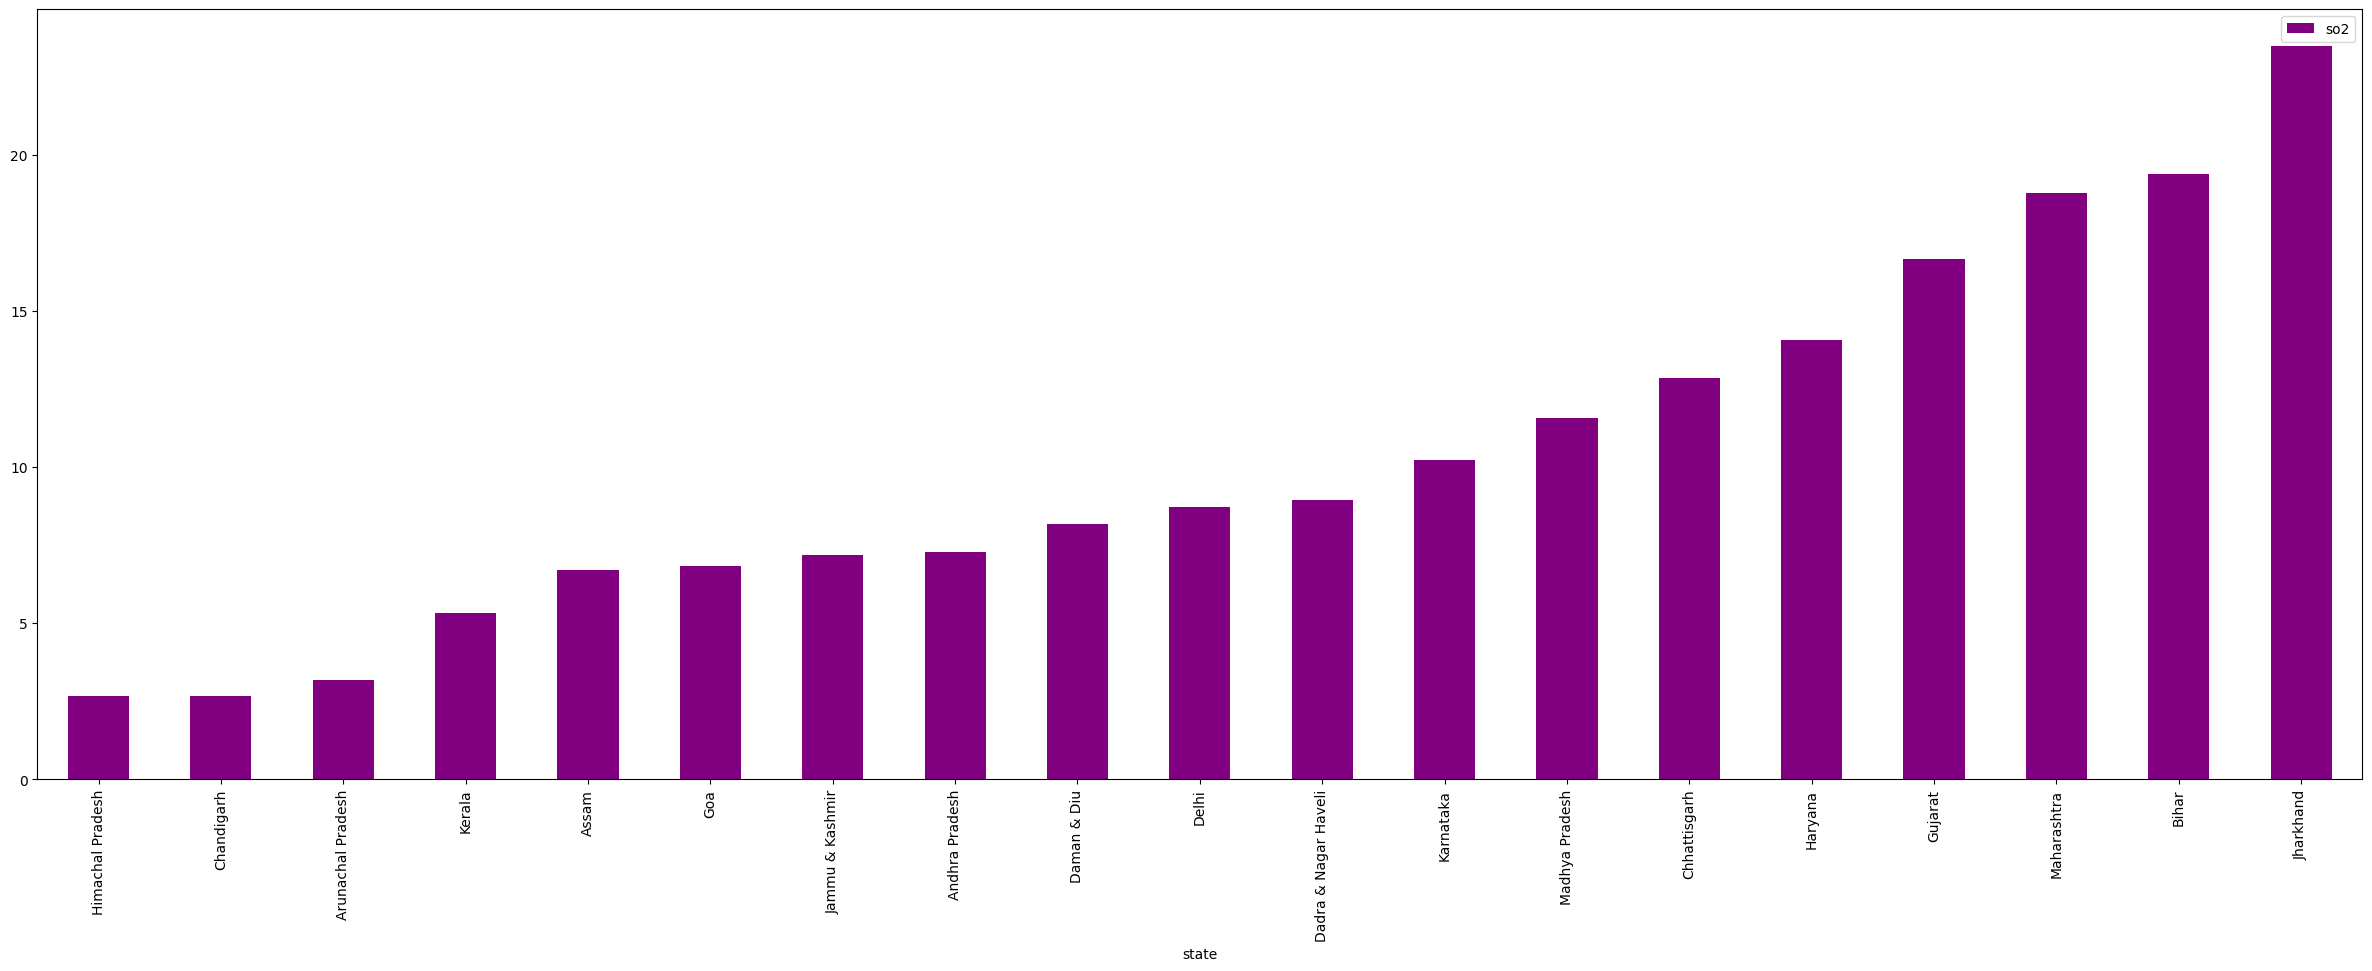

In [18]:
plt.rcParams['figure.figsize']=(30,10)
df[['so2','state']].groupby(["state"]).mean().sort_values(by='so2').plot.bar(color='purple')
plt.show()

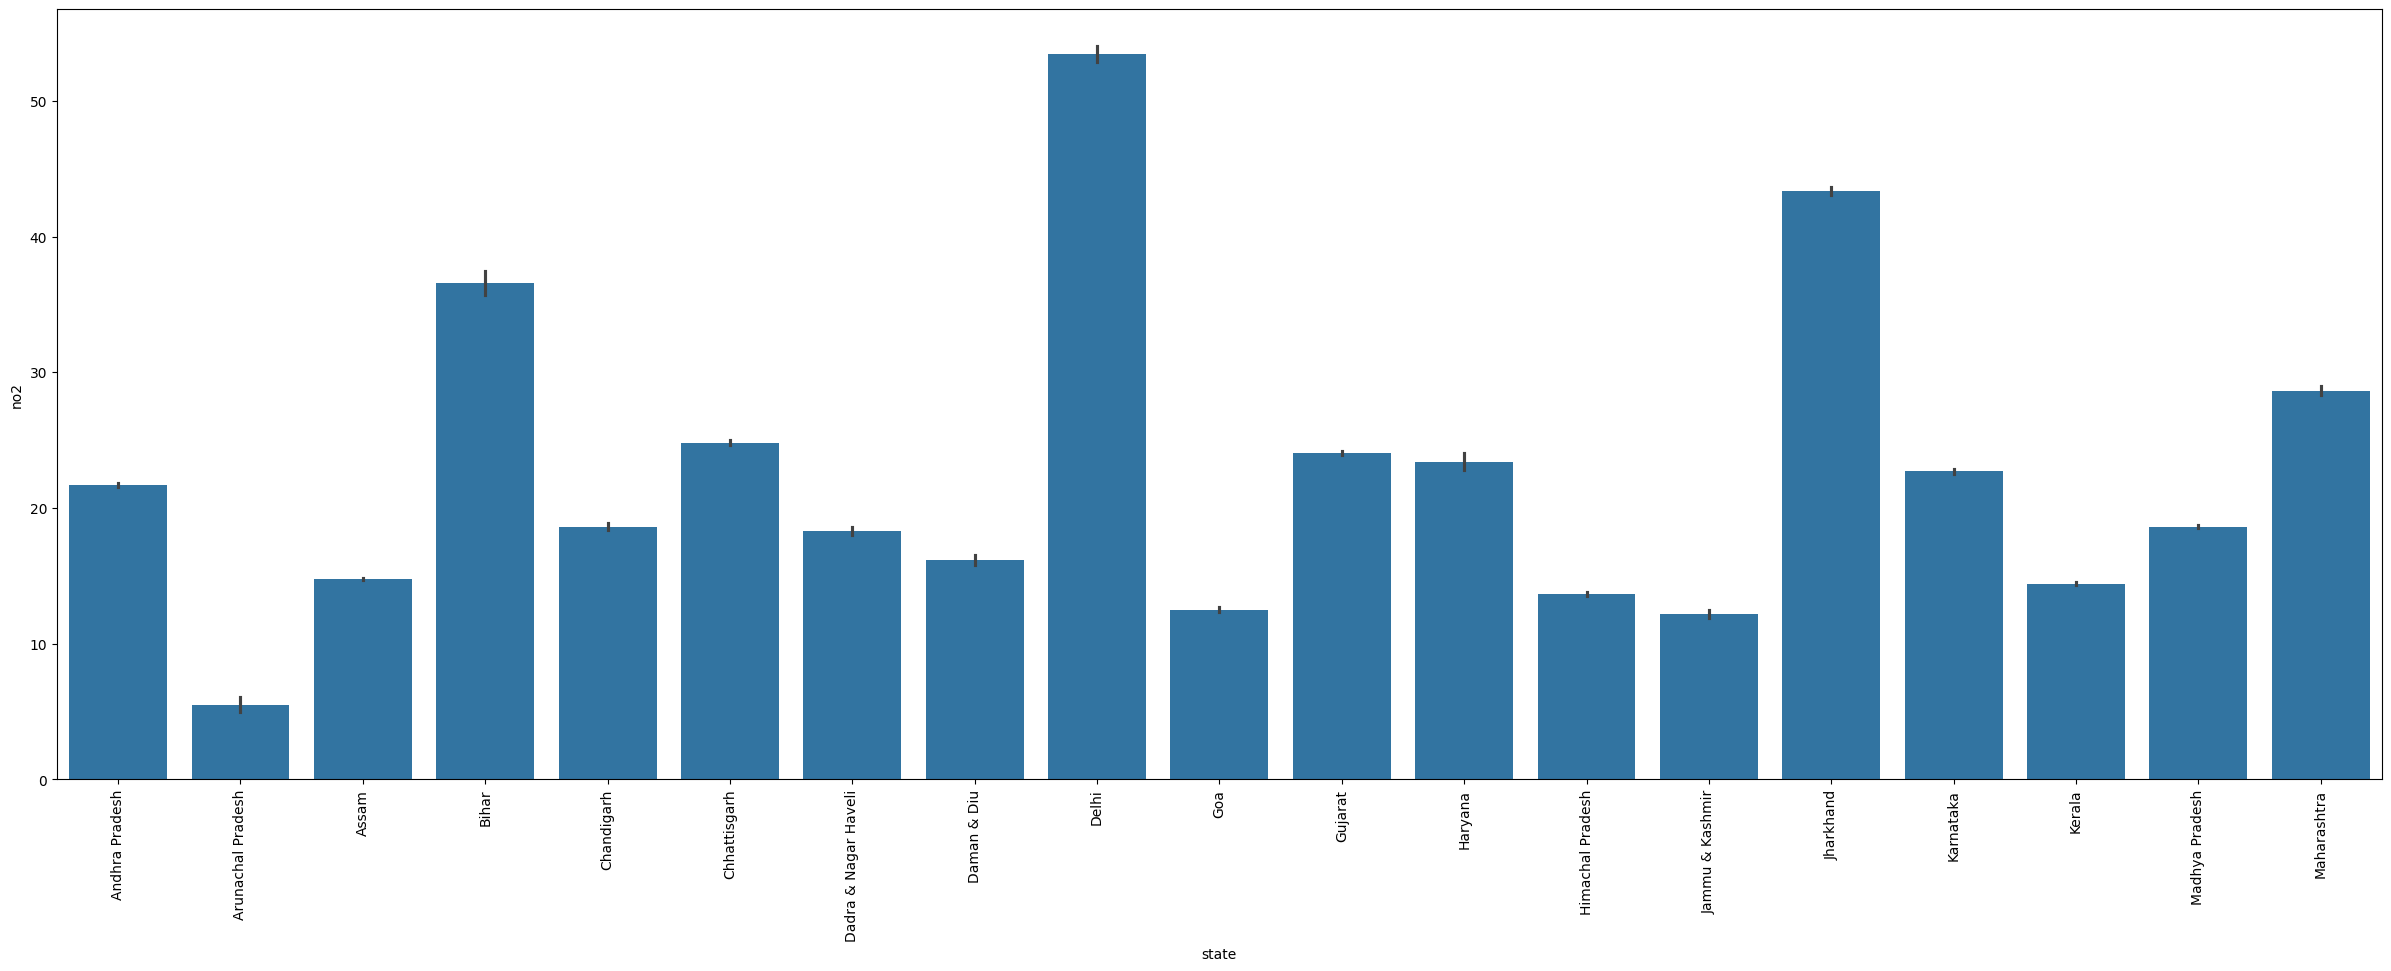

In [19]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='no2',data=df);

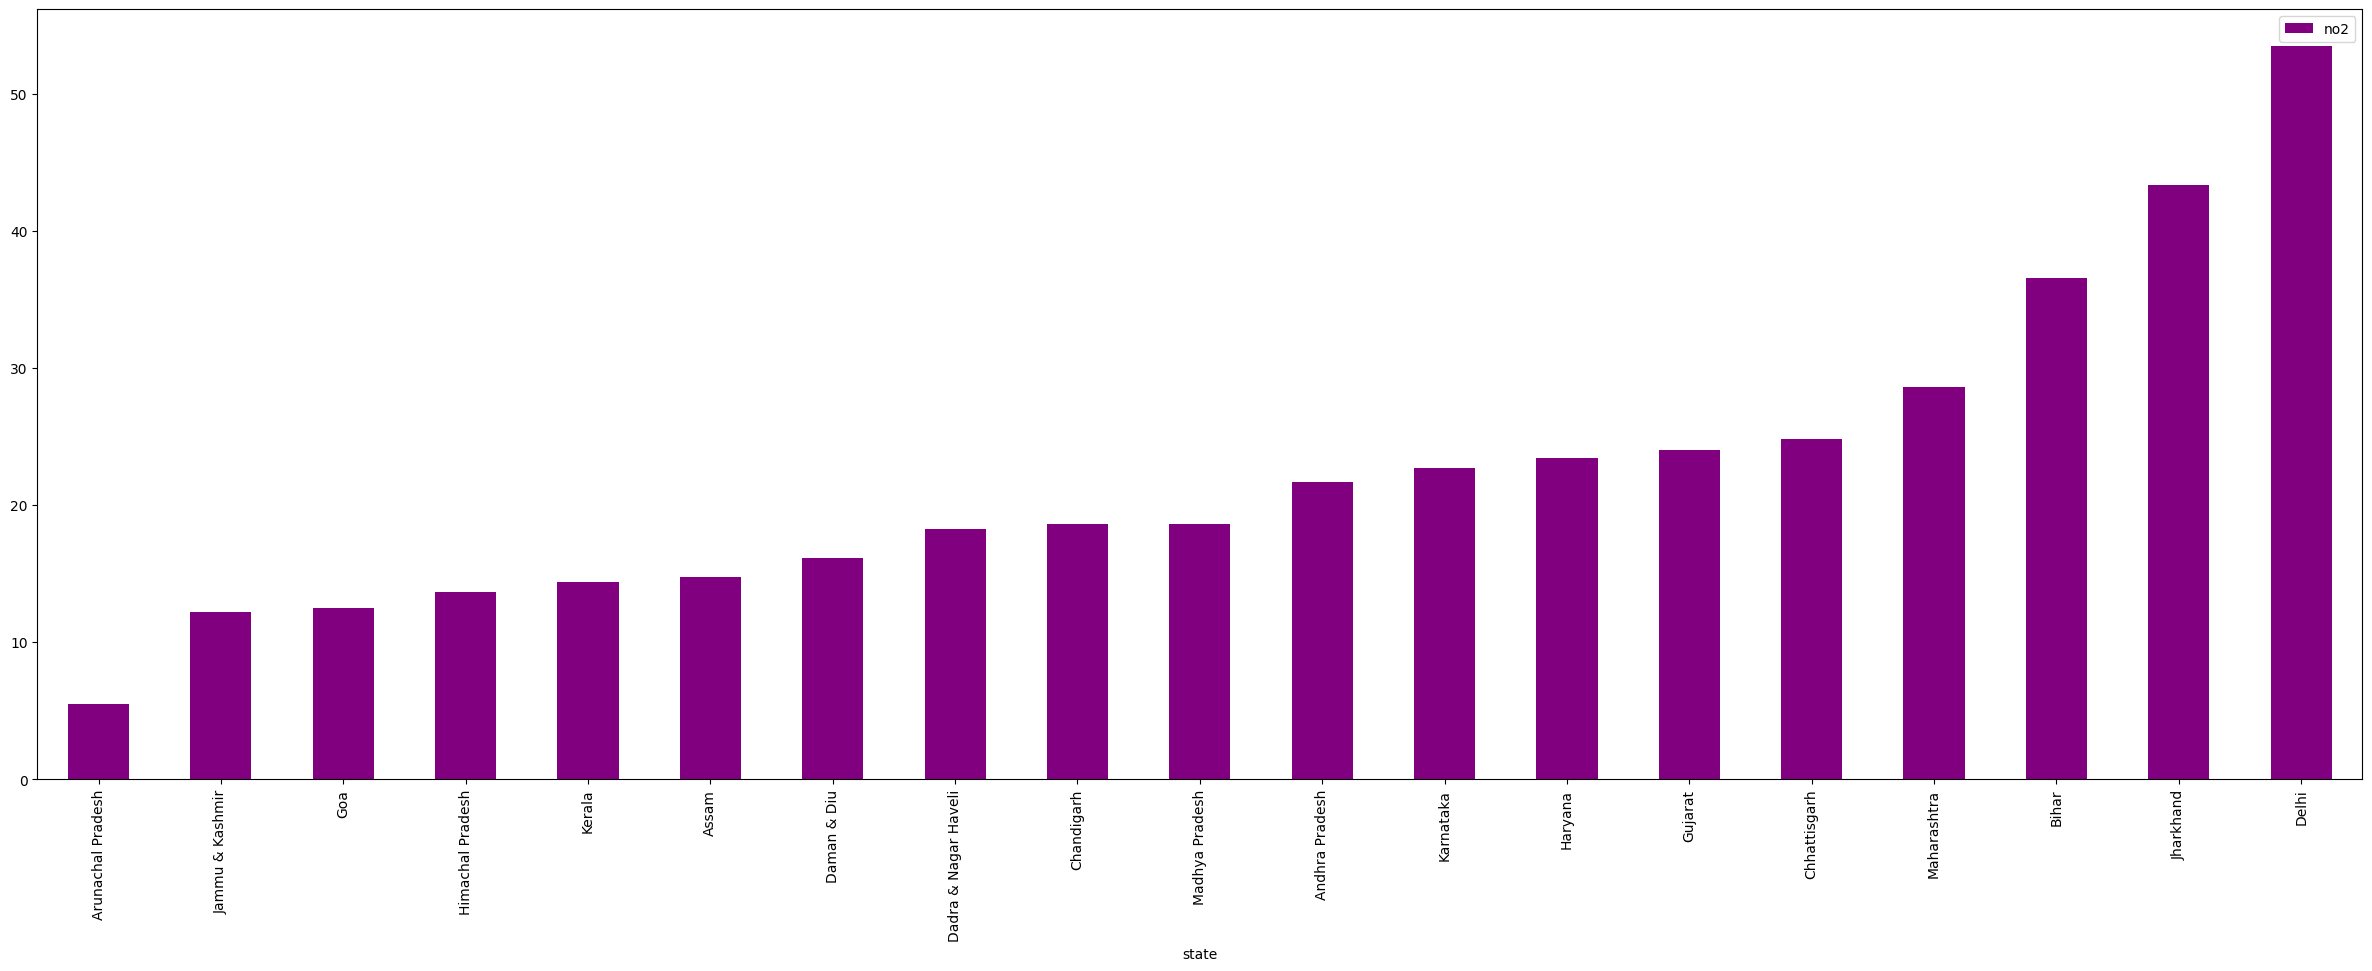

In [20]:
df[['no2','state']].groupby(["state"]).mean().sort_values(by='no2').plot.bar(color='purple')
plt.show()

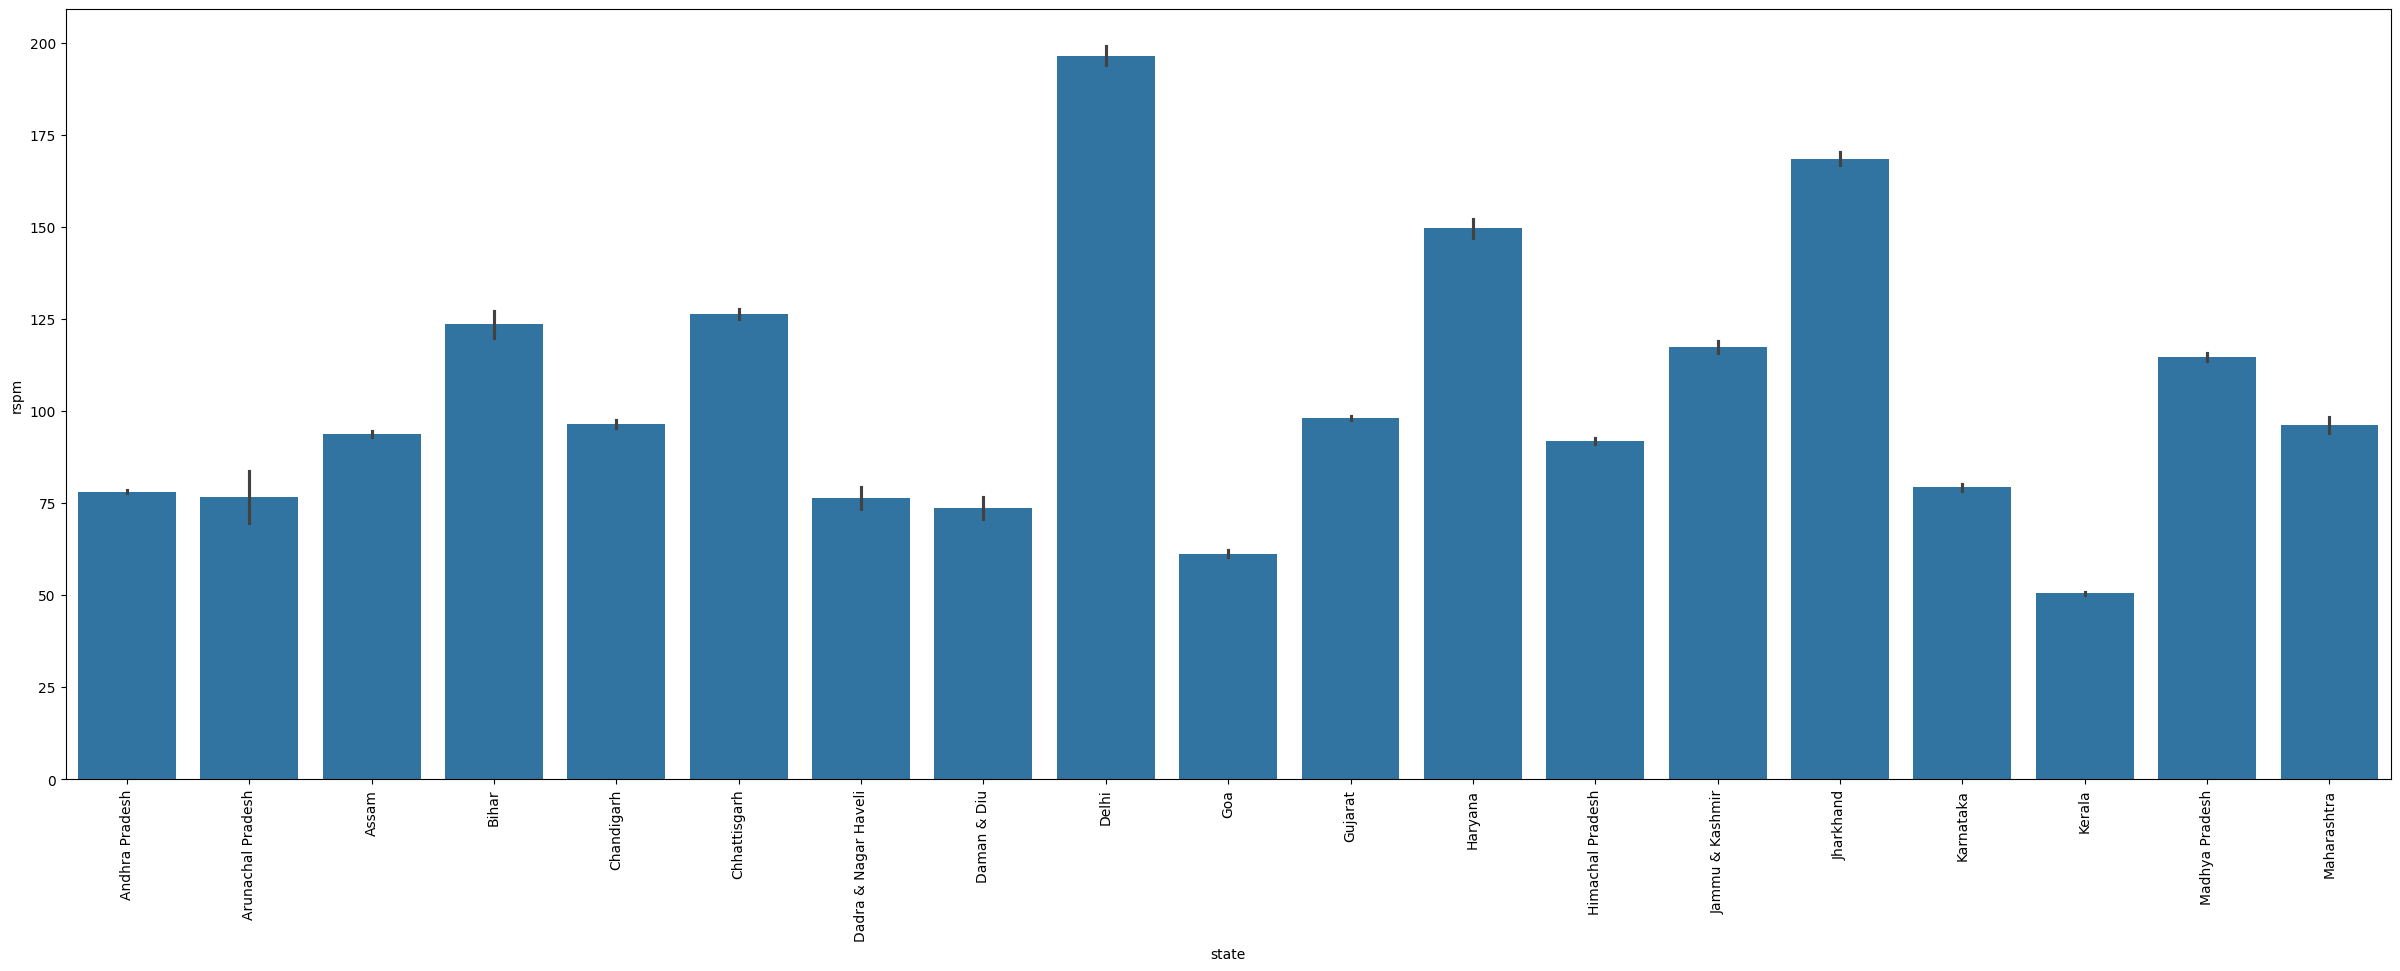

In [21]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='rspm',data=df);

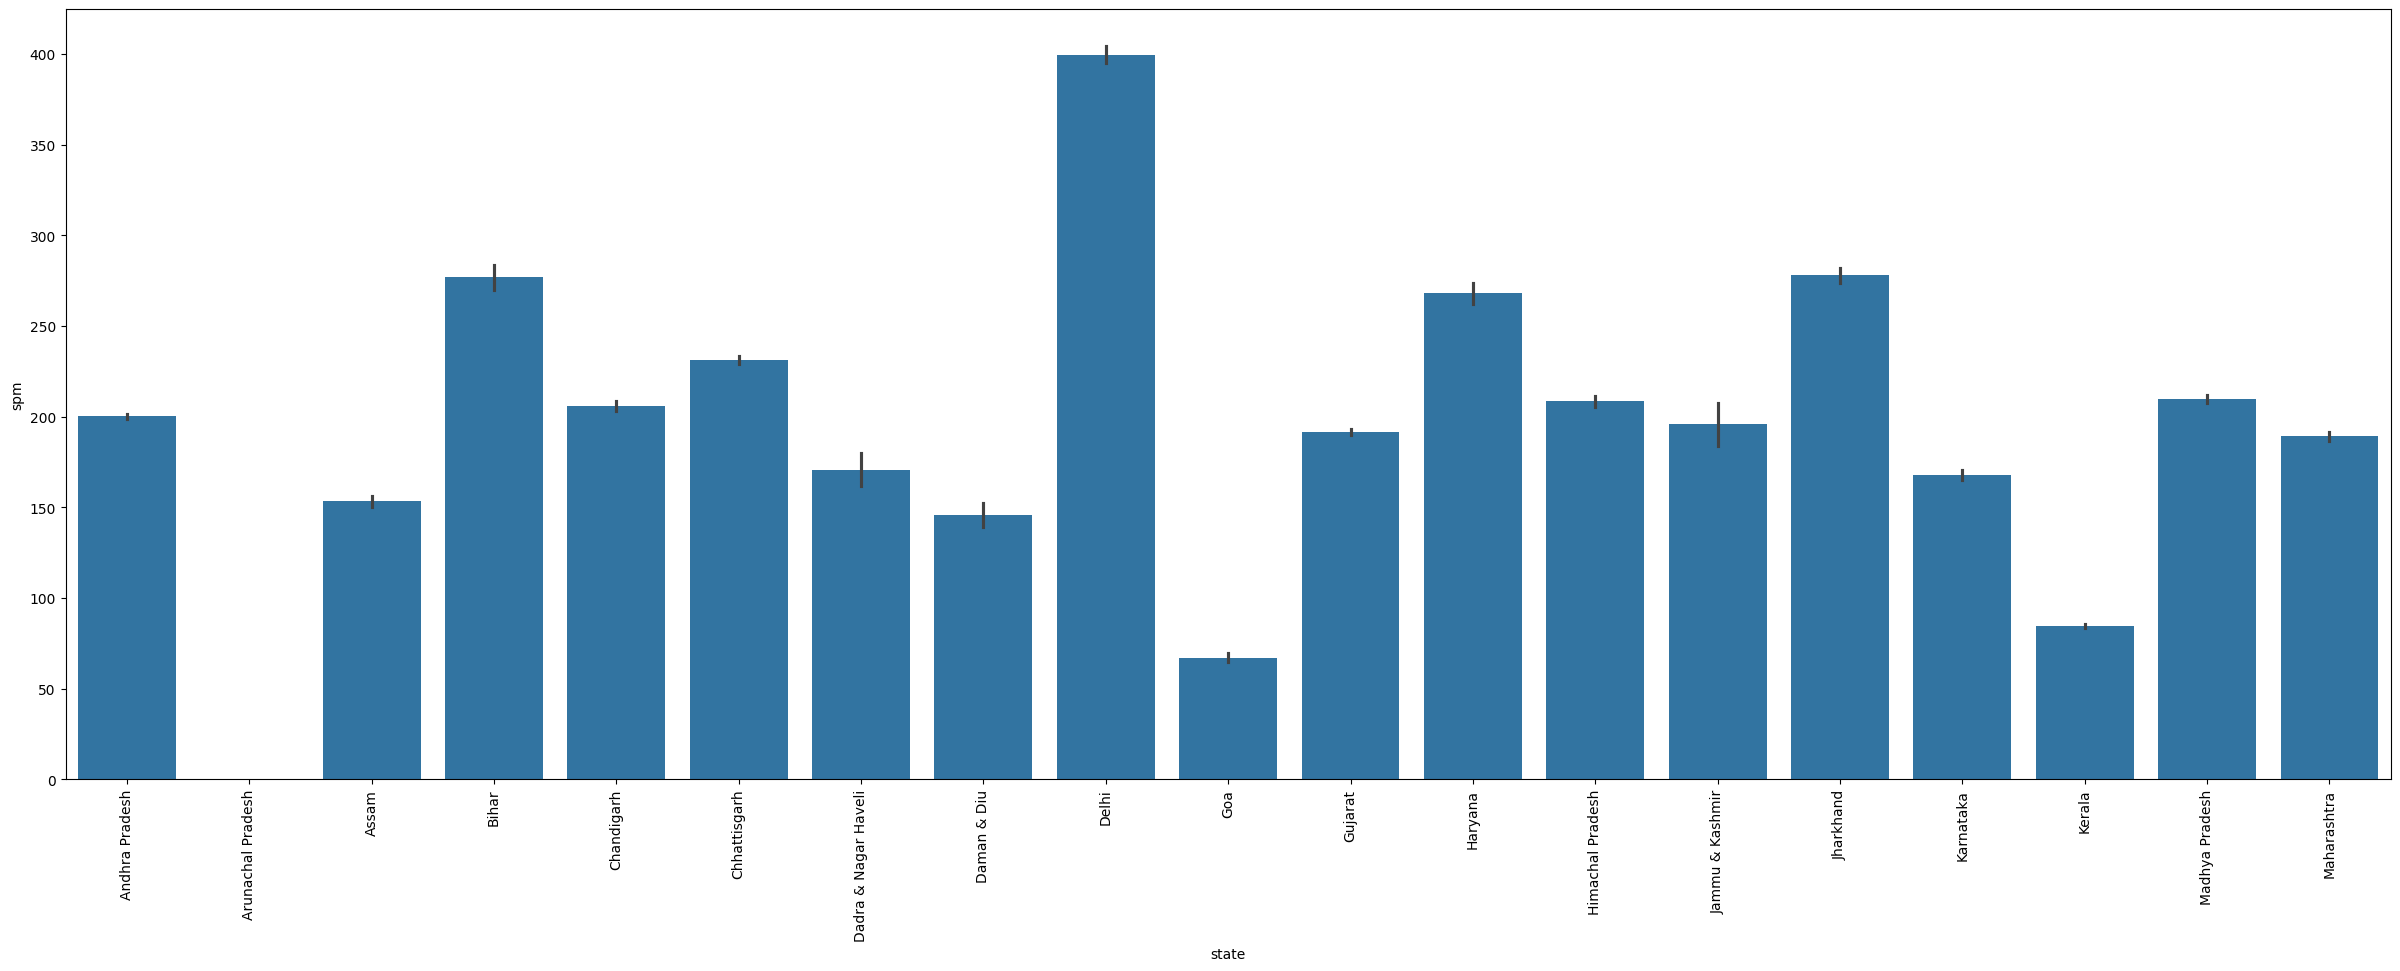

In [22]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='spm',data=df);

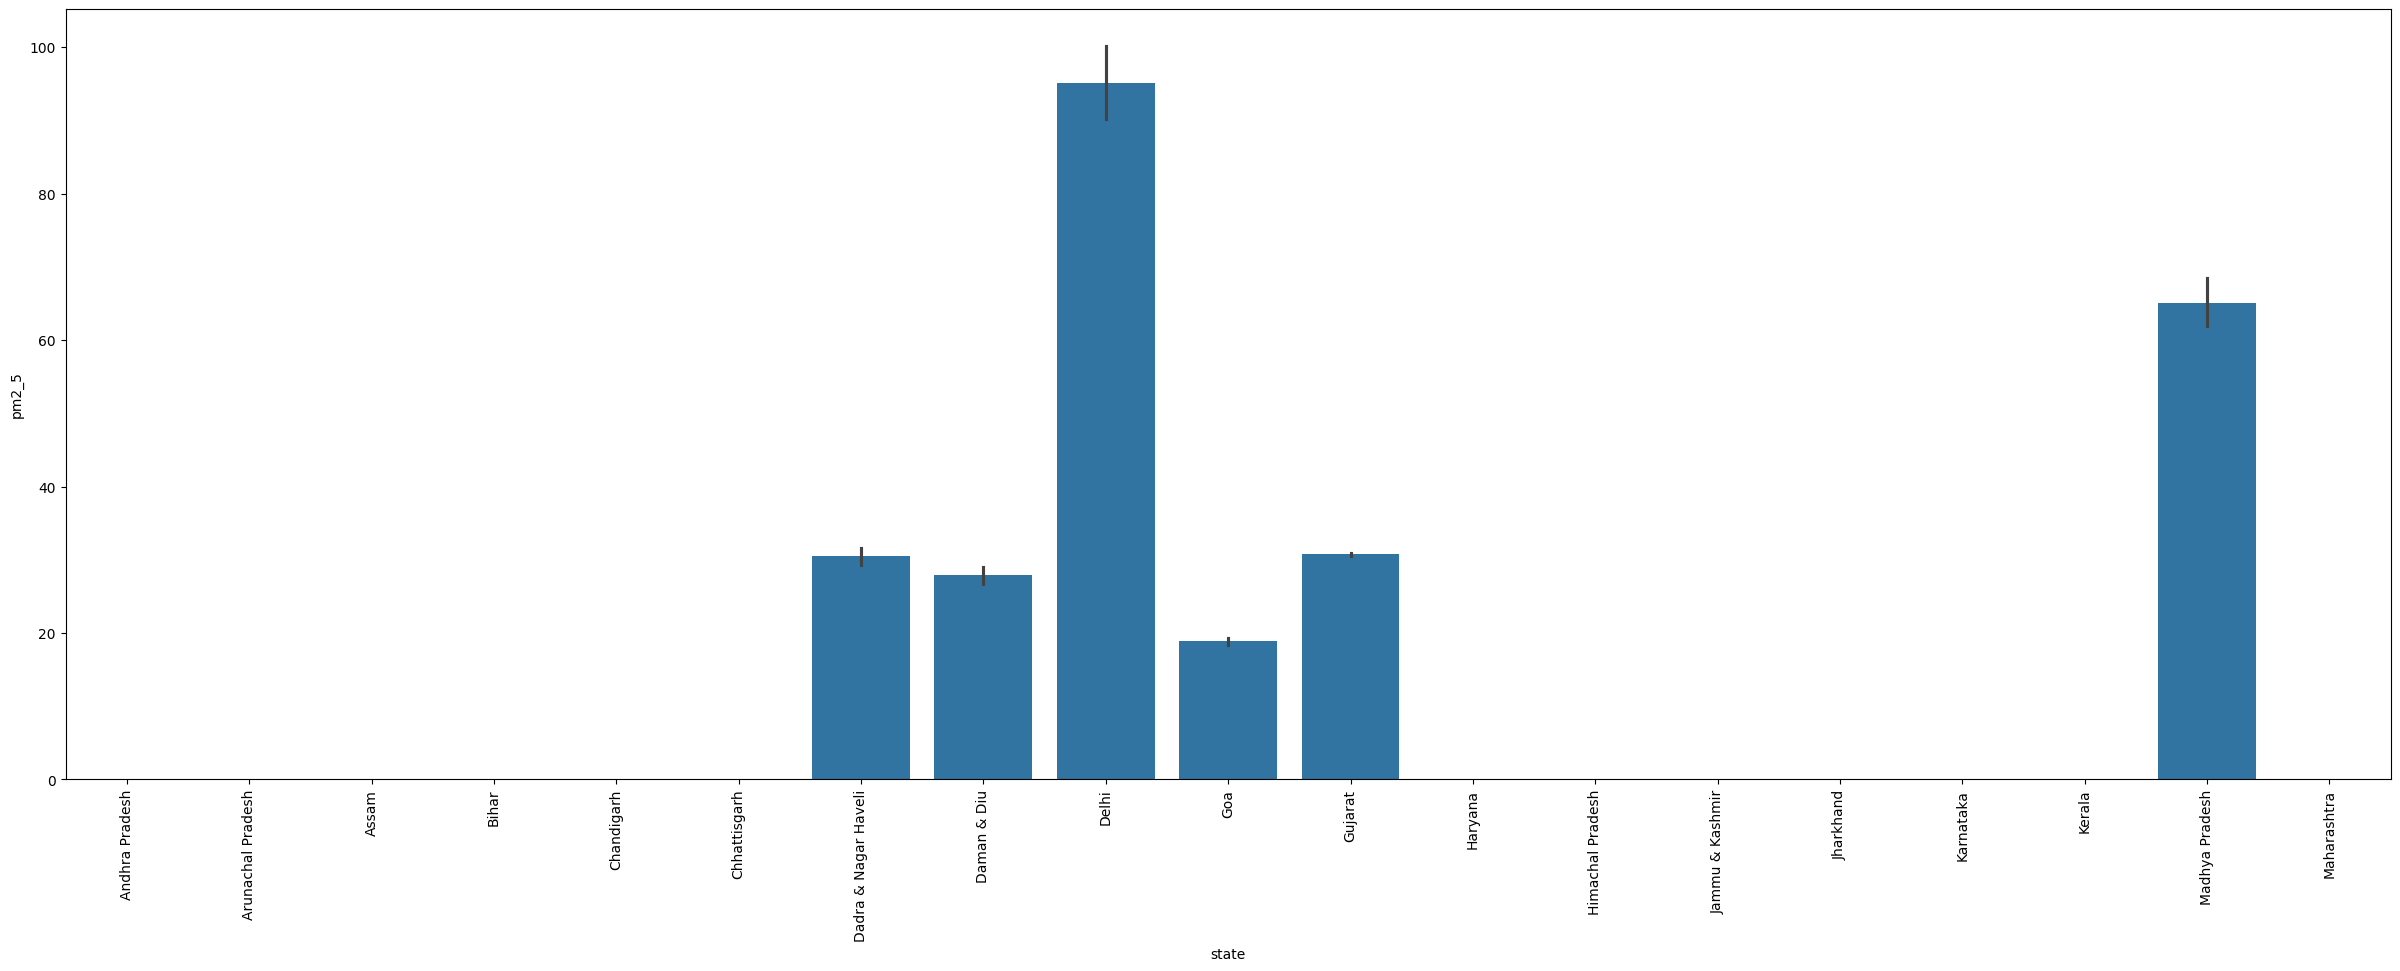

In [23]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='pm2_5',data=df);

In [24]:
nullvalues = df.isnull().sum().sort_values(ascending=False)

In [25]:
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)

In [26]:
missing_data_with_percentage = pd.concat([nullvalues, null_values_percentage], axis=1, keys=['Total', 'Percent'])

In [27]:
missing_data_with_percentage

,Total,Percent
pm2_5,202159,97.549665
spm,104572,50.460101
agency,76209,36.773839
stn_code,72962,35.207033
rspm,24123,11.640296
so2,20967,10.117402
location_monitoring_station,16801,8.107143
no2,10112,4.879438
type,2957,1.426869
date,1,0.000483


In [28]:
df.drop(['agency'],axis=1,inplace=True)
df.drop(['stn_code'],axis=1,inplace=True)
df.drop(['date'],axis=1,inplace=True)
df.drop(['sampling_date'],axis=1,inplace=True)
df.drop(['location_monitoring_station'],axis=1,inplace=True)

df.isnull().sum()

,0
state,0
location,0
type,2957
so2,20967
no2,10112
rspm,24123
spm,104572
pm2_5,202159


In [29]:
df

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
207232,Maharashtra,Amravati,Residential and others,7.5,7.1,61.0,NaN,NaN
207233,Maharashtra,Amravati,Residential and others,9.3,7.6,63.0,NaN,NaN
207234,Maharashtra,Amravati,Residential and others,7.2,6.8,36.0,NaN,NaN
207235,Maharashtra,Amravati,Residential and others,7.5,6.9,34.0,NaN,NaN


In [30]:
df['location']=df['location'].fillna(df['location'].mode()[0])
df['type']=df['type'].fillna(df['type'].mode()[0])

df.fillna(0, inplace=True)

df.isnull().sum()

,0
state,0
location,0
type,0
so2,0
no2,0
rspm,0
spm,0
pm2_5,0


In [31]:
df

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
207232,Maharashtra,Amravati,Residential and others,7.5,7.1,61.0,0.0,0.0
207233,Maharashtra,Amravati,Residential and others,9.3,7.6,63.0,0.0,0.0
207234,Maharashtra,Amravati,Residential and others,7.2,6.8,36.0,0.0,0.0
207235,Maharashtra,Amravati,Residential and others,7.5,6.9,34.0,0.0,0.0


In [32]:
def cal_SOi(so2):
    """  calculating the individual pollutant index for so2(sulphur dioxide)
"""
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
df['SOi']=df['so2'].apply(cal_SOi)
data= df[['so2','SOi']]
data.head()



,so2,SOi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


In [33]:
def cal_Noi(no2):
    """calculating the individual pollutant index for no2(nitrogen dioxide)"""
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
df['Noi']=df['no2'].apply(cal_Noi)
data= df[['no2','Noi']]
data.head()

,no2,Noi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


In [34]:
def cal_RSPMI(rspm):
    """calculating the individual pollutant index for rspm(respirable suspended particualte matter concentration)
"""
    rpi=0
    if(rpi<=30):
     rpirpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
df['Rpi']=df['rspm'].apply(cal_RSPMI)
data= df[['rspm','Rpi']]
data.head()

,rspm,Rpi
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0


In [35]:
def cal_SPMi(spm):
    """calculating the individual pollutant index for spm(suspended particulate matter)"""
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi

df['SPMi']=df['spm'].apply(cal_SPMi)
data= df[['spm','SPMi']]
data.head()

,spm,SPMi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [36]:
def cal_aqi(si,ni,rspmi,spmi):
    """Caluclating the Air Quality Index."""
    aqi=0
    if(si>ni and si>rspmi and si>spmi):
     aqi=si
    if(ni>si and ni>rspmi and ni>spmi):
     aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi):
     aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi):
     aqi=spmi
    return aqi

df['AQI']=df.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['Rpi'],x['SPMi']),axis=1)
data= df[['state','SOi','Noi','Rpi','SPMi','AQI']]
data.head()

,state,SOi,Noi,Rpi,SPMi,AQI
0,Andhra Pradesh,6.000,21.750,0,0.0,21.750
1,Andhra Pradesh,3.875,8.750,0,0.0,8.750
2,Andhra Pradesh,7.750,35.625,0,0.0,35.625
3,Andhra Pradesh,7.875,18.375,0,0.0,18.375
4,Andhra Pradesh,5.875,9.375,0,0.0,9.375


In [37]:
def AQI_Range(x):
    """Using threshold values to classify a particular values as good, moderate, poor, unhealthy, very unhealthy and Hazardous"""
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy."
    elif x>400:
        return "Hazardous"

df['AQI_Range'] = df['AQI'] .apply(AQI_Range)
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,SOi,Noi,Rpi,SPMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0,6.000,21.750,0,0.0,21.750,Good
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0,3.875,8.750,0,0.0,8.750,Good
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0,7.750,35.625,0,0.0,35.625,Good
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0,7.875,18.375,0,0.0,18.375,Good
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0,5.875,9.375,0,0.0,9.375,Good


In [38]:
df['AQI_Range'].value_counts()

,count
AQI_Range,
Good,106970
Poor,51687
Moderate,21609
Unhealthy,15922
Very unhealthy.,5884
Hazardous,5165


In [39]:
X2 = df[['SOi','Noi','Rpi','SPMi']]
Y2 = df['AQI_Range']
# Splitting the data into independent and dependent columns for classification

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.33, random_state=70)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [41]:
log_reg = LogisticRegression().fit(X_train2, Y_train2)

train_preds2 = log_reg.predict(X_train2)
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds2))

test_preds2 = log_reg.predict(X_test2)
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds2))
print('-'*50)

print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds2))

Model accuracy on train is:  0.7239499308596451
Model accuracy on test is:  0.7235374109871471
--------------------------------------------------
KappaScore is:  0.5628934891641499


In [42]:
DT2 = DecisionTreeClassifier().fit(X_train2,Y_train2)

train_preds3 = DT2.predict(X_train2)
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds3))

test_preds3 = DT2.predict(X_test2)
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds3))
print('-'*50)

print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds3))

Model accuracy on train is:  1.0
Model accuracy on test is:  0.9999707555308602
--------------------------------------------------
KappaScore is:  0.9999552371676828


In [43]:
RF=RandomForestClassifier().fit(X_train2,Y_train2)

train_preds4 = RF.predict(X_train2)
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds4))

test_preds4 = RF.predict(X_test2)
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds4))
print('-'*50)

print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds4))

Model accuracy on train is:  1.0
Model accuracy on test is:  0.9998976443580108
--------------------------------------------------
KappaScore is:  0.9998433297129563


In [44]:
KNN = KNeighborsClassifier().fit(X_train2,Y_train2)

train_preds5 = KNN.predict(X_train2)
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds5))

test_preds5 = KNN.predict(X_test2)
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds5))
print('-'*50)

print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds5))

Model accuracy on train is:  0.9982210762848582
Model accuracy on test is:  0.9965491526415067
--------------------------------------------------
KappaScore is:  0.9947159178300341


In [45]:
models = {"Logistic Regression": LogisticRegression(),
          "DecisionTreeClassifier": DecisionTreeClassifier(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

In [49]:
def fit_and_score(models, X_train, X_test, y_train, y_test):

    np.random.seed(42)

    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name]=model.score(X_test, y_test)
    return model_scores

In [47]:
model_scores = fit_and_score(models=models, X_train=X_train2, X_test=X_test2, y_train=Y_train2, y_test=Y_test2)  # Changed 'modelsmodels' to 'models'
model_scores

{'Logistic Regression': 0.7235374109871471,
 'DecisionTreeClassifier': 0.9999707555308602,
 'KNN': 0.9965491526415067,
 'Random Forest': 0.9999268888271505}

<Axes: >

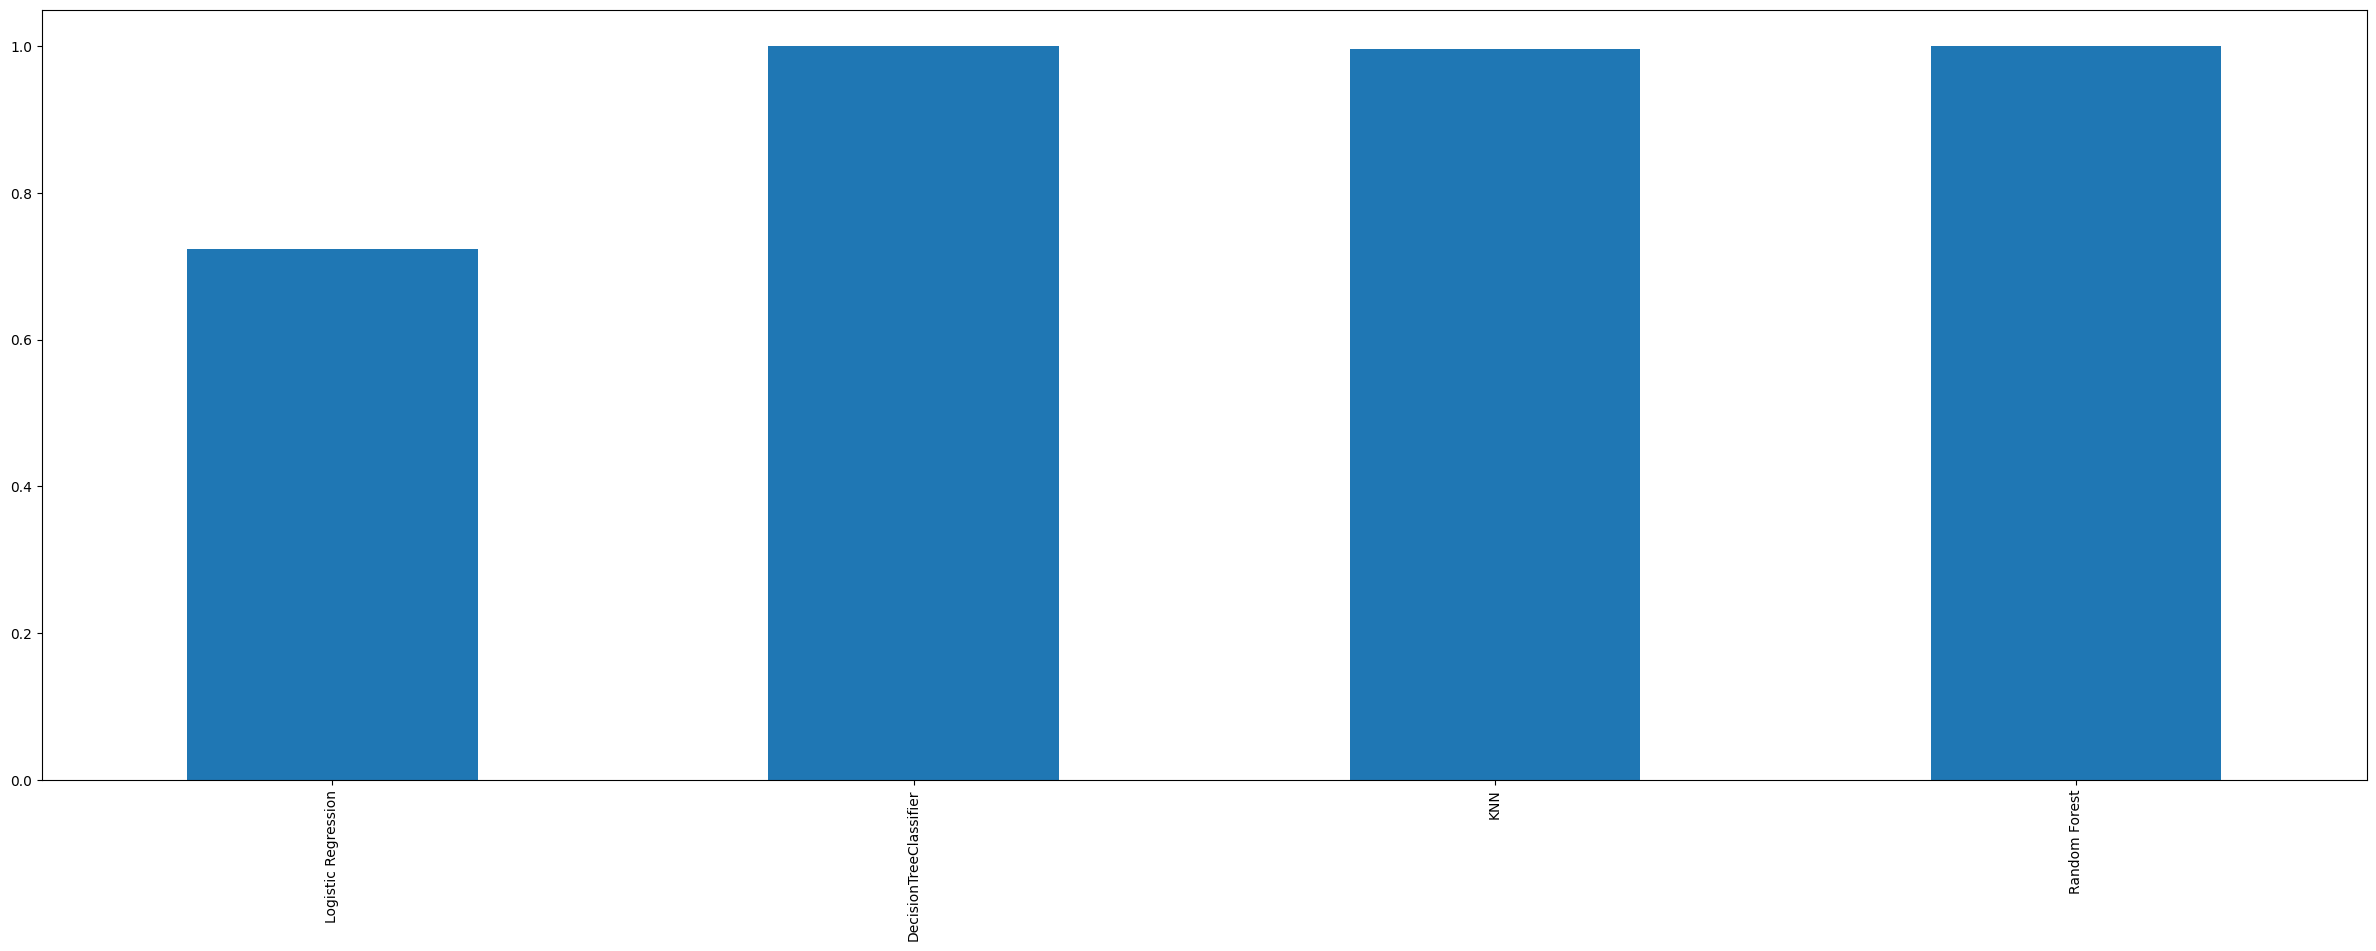

In [48]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar(legend=False)